In [182]:
from Models import *
from Utils import *
import warnings
# warnings.filterwarnings('ignore')

In [183]:
from gensim.models import KeyedVectors
import sentencepiece as spm

max_len = 15
enablePadding = False

sp = spm.SentencePieceProcessor()
sp.Load('/work/data/bpe/en.wiki.bpe.op50000.model')
bpe = KeyedVectors.load_word2vec_format("/work/data/bpe/en.wiki.bpe.op50000.d200.w2v.bin", binary=True)
bpe.index2word = [''] + bpe.index2word + ['<sos>'] + ['<eos>']  # add empty string 
nb_words = len(bpe.index2word)
# word2index
bpe_dict = {bpe.index2word[i]: i for i in range(len(bpe.index2word))}
# construct embedding_matrix
embedding_matrix = np.concatenate([np.zeros((1, bpe.vector_size)), bpe.vectors, np.zeros((2, bpe.vector_size))]) # add zero vector for empty string (i.e. used for padding)

embedding_layer = Embedding(nb_words,
                    embedding_matrix.shape[-1],
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True)

In [236]:
df = pd.read_csv("/data/t-mipha/agix/datasets/query_logs/CLICKED_QQ_MUL_2017-01-01_2017-06-10_r_train_ASCIIonly.txt", nrows=1000000, sep="\t", header=None, names=['q', 'd', 'label', 'feature', 'null'])
df = df.dropna()
df.d = [i.split("<sep>")[0] for i in df.d.tolist()]
df.label = np.ones(len(df))

In [88]:
sts2015_df = pd.read_csv("/work/workspace/dataset-sts/data/sts/semeval-sts/all/2015.train.tsv", sep="\t", header=None, error_bad_lines=False, names=["label", "q", "d"])

In [92]:
sts2015_df = pd.read_csv("/work/workspace/dataset-sts/data/sts/semeval-sts/all/2015.test.tsv", sep="\t", names=["label", "q", "d"],  header=None, error_bad_lines=False)

In [93]:
q_sts2015_df = parse_texts_bpe(sts2015_df.q.tolist(), sp, bpe_dict, max_len, enablePadding)
d_sts2015_df = parse_texts_bpe(sts2015_df.d.tolist(), sp, bpe_dict, max_len, enablePadding)

not a string
not a string
not a string
not a string
not a string
not a string
not a string


In [259]:
%%time
df = pd.read_csv("/work/data/train_data/30M_QD_lower2.txt", nrows=100000, usecols=[0,1,2], names=["label","q", "d"], sep="\t", header=None, error_bad_lines=False)

CPU times: user 328 ms, sys: 28 ms, total: 356 ms
Wall time: 349 ms


In [260]:
# df = df[df.label == 1]

In [261]:
%%time
enablePadding = False
q_df = parse_texts_bpe(df.q.tolist(), sp, bpe_dict, max_len, enablePadding, "post")
d_df = parse_texts_bpe(df.d.tolist(), sp, bpe_dict, max_len, enablePadding, "post")

CPU times: user 9.14 s, sys: 128 ms, total: 9.27 s
Wall time: 9.14 s


In [262]:
def addTags(x, bpe_dict, max_len):
    dec_input = np.copy(x)
    dec_output = np.copy(x)
    for i in range(len(x)):
        dec_input[i] = [bpe_dict['<sos>']] + dec_input[i] + [bpe_dict['<eos>']]
        dec_output[i] = dec_output[i] + [bpe_dict['<eos>']]

    return pad_sequences(dec_input, maxlen=max_len, padding="post"), pad_sequences(dec_output, maxlen=max_len, padding="post")

In [263]:
q_dec_inputs, q_dec_outputs = addTags(q_df, bpe_dict, max_len)
d_dec_inputs, d_dec_outputs = addTags(d_df, bpe_dict, max_len)

In [264]:
enablePadding = True
q_df = parse_texts_bpe(df.q.tolist(), sp, bpe_dict, max_len, enablePadding, "post")
d_df = parse_texts_bpe(df.d.tolist(), sp, bpe_dict, max_len, enablePadding, "post")


In [265]:
np.save("/work/data/train_data/100K_QD_ml15.q.npy", q_df)
np.save("/work/data/train_data/100K_QD_ml15.d.npy", d_df)
np.save("/work/data/train_data/100K_QD_ml15.label.npy", df.label.values)

np.save("/work/data/train_data/100K_QD_ml15.q.di.npy", q_dec_inputs)
np.save("/work/data/train_data/100K_QD_ml15.d.di.npy", d_dec_inputs)

np.save("/work/data/train_data/100K_QD_ml15.q.do.npy", q_dec_outputs)
np.save("/work/data/train_data/100K_QD_ml15.d.do.npy", d_dec_outputs)


In [24]:
# dec_q_train = pad_sequences(pad_sequences(q_df_, maxlen=max_len+1, value=bpe_dict['<sos>']), maxlen=max_len, truncating="post")
# dec_d_train = pad_sequences(pad_sequences(d_df_, maxlen=max_len+1, value=bpe_dict['<sos>']), maxlen=max_len, truncating="post")

# np.save("/work/data/train_data/30M_QD_ml15.q_.<sos>.npy", dec_q_train)
# np.save("/work/data/train_data/30M_QD_ml15.d_.<sos>.npy", dec_d_train)

In [12]:
# np.save("/work/data/train_data/30M_QD_ml15.q.npy", q_df)
# np.save("/work/data/train_data/30M_QD_ml15.d.npy", d_df)
# np.save("/work/data/train_data/30M_QD_ml15.label.npy", df.label.values)


In [23]:
# np.save("/work/data/train_data/30M_QD_ml15.q_.npy", q_df_)
# np.save("/work/data/train_data/30M_QD_ml15.d_.npy", d_df_)

In [112]:
q_df = np.load("/work/data/train_data/30M_QD_ml15.q_.<sos>.npy")

In [113]:
q_df[0]
for i in q_df[0]:
    print(bpe.index2word[i])

<sos>
▁facebook
▁log
▁in













In [100]:
q_df

array([[50510,  7461,  4212, ...,     0,     0,     0],
       [50510,  3802, 34943, ...,     0,     0,     0],
       [50510,  1850,     8, ...,     0,     0,     0],
       ...,
       [50510,  6824,   106, ...,     0,     0,     0],
       [50510,  6455, 11146, ...,     0,     0,     0],
       [50510, 14651,  1451, ...,     0,     0,     0]], dtype=int32)

In [102]:
q_df

array([[    0,     0,     0, ...,  7461,  4212,     5],
       [    0,     0,     0, ..., 43852,  2966,  2936],
       [    0,     0,     0, ...,  1365,    89,  6772],
       ...,
       [    0,     0,     0, ...,  9597,  1136,  1523],
       [    0,     0,     0, ...,  6455, 11146, 13095],
       [    0,     0,     0, ...,   978,  1440,  1584]], dtype=int32)

In [96]:
bpe.index2word[50510]

'<sos>'

In [40]:
df_may, qrel_may = get_test_data("MayFlower", "/work/")
df_june, qrel_june = get_test_data("JuneFlower", "/work/")
df_july, qrel_july = get_test_data("JulyFlower", "/work/")

enablePadding = False

q_may = parse_texts_bpe(df_may.q.tolist(), sp, bpe_dict, max_len, enablePadding)
d_may = parse_texts_bpe(df_may.d.tolist(), sp, bpe_dict, max_len, enablePadding)

q_june = parse_texts_bpe(df_june.q.tolist(), sp, bpe_dict, max_len, enablePadding)
d_june = parse_texts_bpe(df_june.d.tolist(), sp, bpe_dict, max_len, enablePadding)

q_july = parse_texts_bpe(df_july.q.tolist(), sp, bpe_dict, max_len, enablePadding)
d_july = parse_texts_bpe(df_july.d.tolist(), sp, bpe_dict, max_len, enablePadding)

q_july_ = parse_texts_bpe(df_july.q.tolist(), sp, bpe_dict, max_len, enablePadding, "post")
d_july_ = parse_texts_bpe(df_july.d.tolist(), sp, bpe_dict, max_len, enablePadding, "post")

test_set = [[q_may, d_may, qrel_may, df_may, "MayFlower"], [q_june, d_june, qrel_june, df_june, "JuneFlower"], [q_july, d_july, qrel_july, df_july, "JulyFlower"]]


b'Skipping line 19898: expected 6 fields, saw 8\nSkipping line 20620: expected 6 fields, saw 8\nSkipping line 38039: expected 6 fields, saw 8\n'


In [43]:
bpe.index2word[25942]

'▁thyroid'

In [51]:
set_test_tokens = set([])
test_tokens = []
for i in [q_may, d_may, q_june, d_june, q_july, d_july]:
    for j in i:
        for k in j:
            set_test_tokens.add(k)
            test_tokens.append(k)

In [181]:
1/20

0.05

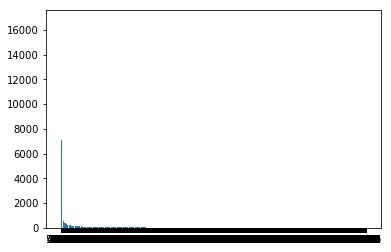

In [53]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

word_list = test_tokens

counts = Counter(word_list)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

In [63]:
labels[:1000]

array([  168,     8, 50509,     1,   594,     5,     4,     7,   366,
          11,    14,    15,   679,   356,     3,     6,  5977,    13,
         469,    93,   141,   315,   759,    18,   726,    28,    17,
        1686,  1208,    59,   418,    26,    34,    65,  2365, 47369,
           2,   360,    55,    31,   156,    86,  3213,  1201,   249,
        2849,  3936,   107,   220,   460,    24,   136,    12,  2573,
          51,    77,   290,  1083,  2779,   551,  1566,   250, 28624,
          72,  2043,    84,  1486,    44, 49350,   212,    38,  3880,
          92,  2513,   218,   562,  4212,    35,   374,  1546,   197,
         192,    88,   196,    16,   180,  2001,   152,    98,   235,
         166,   371,    89,  3473,   184,  2522,  2782,   465,   549,
        1380, 16375,    49,   830, 12203,     9,    70,    46,    22,
         274,  1175,   530,  4238,   137,   659,  1440,   163,   159,
         330,   965,   135,   643,   146,   367,   108,   814,   272,
        6675,   306,

In [65]:
values[:5000]

array([16748, 16216, 15207, ...,    18,    18,    18])

In [61]:
list(values)

[16748,
 16216,
 15207,
 12632,
 12559,
 12016,
 11031,
 10157,
 9487,
 8855,
 7127,
 4618,
 4028,
 3748,
 3531,
 3308,
 3196,
 3089,
 2914,
 2476,
 2202,
 2052,
 1976,
 1947,
 1910,
 1891,
 1730,
 1541,
 1502,
 1488,
 1453,
 1432,
 1422,
 1364,
 1287,
 1280,
 1275,
 1235,
 1208,
 1173,
 1163,
 1157,
 1125,
 1091,
 1087,
 1082,
 1074,
 1056,
 1036,
 1028,
 1012,
 960,
 937,
 900,
 886,
 884,
 865,
 851,
 849,
 846,
 837,
 829,
 803,
 794,
 785,
 778,
 764,
 747,
 728,
 726,
 725,
 692,
 677,
 671,
 641,
 634,
 619,
 619,
 617,
 611,
 608,
 607,
 603,
 602,
 600,
 597,
 592,
 590,
 581,
 572,
 570,
 565,
 556,
 551,
 549,
 548,
 546,
 540,
 540,
 536,
 529,
 526,
 522,
 521,
 520,
 516,
 510,
 510,
 508,
 508,
 507,
 503,
 500,
 496,
 490,
 488,
 488,
 488,
 485,
 485,
 482,
 480,
 479,
 478,
 477,
 475,
 472,
 472,
 469,
 467,
 466,
 463,
 463,
 462,
 460,
 457,
 456,
 456,
 456,
 448,
 446,
 440,
 436,
 434,
 434,
 431,
 431,
 430,
 429,
 429,
 425,
 425,
 424,
 422,
 419,
 418,
 414,

In [58]:
bpe.index2word[50509]

'<unk>'

In [129]:
q_df.shape

NameError: name 'q_df' is not defined

In [137]:
%%time
pad_sequences(pad_sequences(q_df[:256000], maxlen=11), maxlen=10, truncating="post")

CPU times: user 2.96 s, sys: 0 ns, total: 2.96 s
Wall time: 2.71 s


array([[    0,     0,     0, ...,     0,  7461,  4212],
       [    0,     0,     0, ...,   440, 43852,  2966],
       [    0,     0,     0, ...,     5,  1365,    89],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,  1098,   690,  5036],
       [    0,     0,     0, ...,  4021,  3828, 46158]], dtype=int32)

In [138]:
q_df

array([[    0,     0,     0, ...,  7461,  4212,     5],
       [    0,     0,     0, ..., 43852,  2966,  2936],
       [    0,     0,     0, ...,  1365,    89,  6772],
       ...,
       [    0,     0,     0, ...,  9597,  1136,  1523],
       [    0,     0,     0, ...,  6455, 11146, 13095],
       [    0,     0,     0, ...,   978,  1440,  1584]], dtype=int32)

In [64]:
np.max([len(i) for i in np.concatenate([q_july, d_july, q_may, d_may])])
    

59

In [78]:
from keras.layers import Dense, Input, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
class W2V():
    def __init__(self):
        self.encoder = Sequential()

        self.encoder.add(embedding_layer)
        self.encoder.add(GlobalMaxPooling1D())

w2v = W2V()

In [71]:
inp = Input(shape=(max_len,))
drop = Dropout(1.0)
model = Model(inp, drop(inp))

In [101]:
model.predict(q_july).astype(int)

array([[    0,     0,     0, ...,   451,  4764,  2986],
       [ 3354,    87, 14682, ...,   272,  2994, 26480],
       [    0,     0,     0, ...,     4,  5901, 41148],
       ...,
       [    0,   564,  4966, ...,  1569,     2,  1268],
       [    0,     0,     0, ...,     7,  2277,  3008],
       [    0,     0,     0, ...,   587,   249,  2063]])

In [119]:
import random
    
        
x_ = word_dropout(q_july, 0.75)    

In [120]:
q_july

array([[    0,     0,     0, ...,   451,  4764,  2986],
       [ 3354,    87, 14682, ...,   272,  2994, 26480],
       [    0,     0,     0, ...,     4,  5901, 41148],
       ...,
       [    0,   564,  4966, ...,  1569,     2,  1268],
       [    0,     0,     0, ...,     7,  2277,  3008],
       [    0,     0,     0, ...,   587,   249,  2063]], dtype=int32)

In [121]:
x_

array([[    0,     0,     0, ...,   451,  4764,  2986],
       [ 3354,    87, 14682, ..., 50509,  2994, 26480],
       [    0,     0,     0, ...,     4,  5901, 50509],
       ...,
       [    0, 50509,  4966, ...,  1569,     2,  1268],
       [    0,     0,     0, ...,     7, 50509,  3008],
       [    0,     0,     0, ..., 50509,   249,  2063]], dtype=int32)

In [70]:
encoder = Sequential()

encoder.add(embedding_layer)
encoder.add(GlobalAveragePooling1D())

ValueError: A layer added to a Sequential model must not already be connected somewhere else. Model received layer embedding_2 which has 25 pre-existing inbound connections.

In [10]:
evaluate(encoder, test_set)

(0.5147147202369183, 0.8371547445295584, 0.5832573550668237)

In [12]:
evaluate(encoder, test_set)

(0.5237150474333905, 0.8425962550704119, 0.5428072672285352)

In [34]:
inp = Input(shape=(max_len,))
x_max = GlobalMaxPooling1D()(embedding_layer(inp))
x_avg = GlobalAveragePooling1D()(embedding_layer(inp))
m = merge([x_max, x_avg])
both = Model(inp, m)

In [35]:
evaluate(both, test_set)

(0.5187978233186405, 0.841557671534384, 0.5808001067401988)

In [18]:
evaluate(both, test_set)

(0.5159227314797818, 0.8414010452141721, 0.5800885054148412)

In [82]:
w2v.encoder.predict

<bound method Sequential.predict of <keras.models.Sequential object at 0x7fc565166eb8>>

In [23]:
test_tokens = np.unique(np.concatenate([q_july, d_july, q_may, d_may, q_june, d_june]))

In [3]:
%%time
count = 0
file = open("/work/workspace/Texygen/data/1M_Query_GAN", "a+") 
with open ("/data/chzho/deepqts/train_data/unifiedclick/join_oneyearsample_2B_training_all_top10", "r") as myfile:
    for line in myfile:
        s = line.split("\t")
        market = s[5]
        if "en-" not in market:
            continue
        
#         re.sub(r'\W+', ' ', s[1].lower())
#         file.write("%s\t%s\t%s\n" % (s[0], re.sub(r'\W+', ' ', s[1].lower()), re.sub(r'\W+', ' ', s[3].lower())))

        count = count + 1

        if count > 1000000:
            break
        break
file.close()

CPU times: user 22min 23s, sys: 1min 22s, total: 23min 46s
Wall time: 29min 14s


In [68]:
%%time
count = 0
file = open("/work/data/train_data/QueryQueryLog", "a+") 
query = []
with open ("/work/data/train_data/1M_EN_QQ_log", "r") as myfile:
    for line in myfile:
        s = line.replace("\n", "").split("\t")
#         print(line)
        if len(s) < 2:
            continue
        tmp = s[1].split("<sep>")
        
        __ = re.sub(r'\W+', ' ', s[0].lower())
        for i in tmp:
            _ = re.sub(r'\W+', ' ', i.lower())
            
            file.write(__+"\t"+_+"\t1\n")
        
file.close()

CPU times: user 27 s, sys: 376 ms, total: 27.4 s
Wall time: 27.6 s


In [ ]:
%%time
count = 0
file = open("/work/data/train_data/QueryLogBPE", "a+") 
query = []
with open ("/work/data/train_data/1M_EN_QQ_log", "r") as myfile:
    for line in myfile:
        s = line.replace("\n", "").split("\t")
#         print(line)
        if len(s) < 2:
            continue
        tmp = s[1].split("<sep>")
        
        __ = re.sub(r'\W+', ' ', s[0].lower())
        for i in tmp:
            _ = re.sub(r'\W+', ' ', i.lower())
            
            file.write(__+"\t"+_+"\t1\n")
        
file.close()

In [42]:
df = pd.read_csv("/work/data/train_data/QueryLog", names=["q"], sep="\t", header=None, error_bad_lines=False)


In [65]:
%%time
df_bpe_token = set([])
for i in df.q.tolist():
    for j in sp.EncodeAsPieces(i):
        df_bpe_token.add(j)


CPU times: user 1min 41s, sys: 696 ms, total: 1min 42s
Wall time: 1min 41s


In [124]:
len(df_token)

561556

In [45]:
df_token = set([])
july_token = set([])

for i in df.q.tolist():
    for j in i.split():
        df_token.add(j)


In [47]:
df_may, qrel_may = get_test_data("MayFlower", "/work/")
df_june, qrel_june = get_test_data("JuneFlower", "/work/")
df_july, qrel_july = get_test_data("JulyFlower", "/work/")

b'Skipping line 19898: expected 6 fields, saw 8\nSkipping line 20620: expected 6 fields, saw 8\nSkipping line 38039: expected 6 fields, saw 8\n'


In [64]:
print("Term Overlap between train and test dataset. QueryLog")
for a in [df_may, df_june, df_july]:
    token = set([])
    for i in a.q.tolist() + a.d.tolist():
        for j in i.split():
            token.add(j)
    print(len(token))
    print(len(df_token.intersection(token)))

Term Overlap between train and test dataset. QueryLog
12853
9648
13351
8799
1372
1310


In [66]:
print("BPE tokens overlap between train and test dataset. QueryLog")
for a in [df_may, df_june, df_july]:
    token = set([])
    for i in a.q.tolist() + a.d.tolist():
        for j in sp.EncodeAsPieces(i):
            token.add(j)
    print(len(token))
    print(len(df_bpe_token.intersection(token)))

BPE tokens overlap between train and test dataset. QueryLog
11276
10734
10280
10162
1556
1525


In [69]:
df = pd.read_csv("/work/data/train_data/QueryLog", names=["q"], sep="\t", header=None, error_bad_lines=False)

In [74]:
%%time
q_df = parse_texts_bpe(df.q.tolist(), sp, bpe_dict, 5, enablePadding=True)


CPU times: user 2min 40s, sys: 1.76 s, total: 2min 42s
Wall time: 2min 40s


In [95]:
x_test_reconstructed = np.random.randint(5, size=(1,5, 5))
sent_idx = 0
reconstructed_indexes = np.apply_along_axis(np.argmax, 1, x_test_reconstructed[sent_idx])


In [97]:
x_test_reconstructed

array([[[3, 0, 0, 2, 4],
        [2, 3, 4, 1, 1],
        [1, 1, 2, 0, 2],
        [0, 2, 4, 2, 1],
        [4, 0, 3, 0, 4]]])

In [90]:
np.apply_along_axis?

In [119]:
a = np.random.randint(10, size=(1,4, 3))
gen_y = np.argmax(a, axis=-1)


In [120]:
gen_y

array([[1, 0, 1, 0]])

In [121]:
np.apply_along_axis(np.argmax, 1, a[0])

array([1, 0, 1, 0])

In [122]:
a

array([[[2, 7, 6],
        [7, 5, 4],
        [1, 3, 0],
        [9, 5, 5]]])